In [1]:
from scipy import stats as ss
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from statsmodels.stats import multicomp as smsm
from statsmodels.formula import api as smfa
from statsmodels import api as sma
from statsmodels.stats.anova import anova_lm
from statsmodels.sandbox.stats.runs import runstest_1samp, runstest_2samp
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from scipy.cluster import hierarchy as sch
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from statsmodels.tsa import seasonal as smts
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from pmdarima import auto_arima

In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris

In [3]:
cats_df = pd.read_csv('data/cats.csv')
cats_df

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [4]:
cats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [5]:
mu = 2.6
ss.shapiro(cats_df['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [6]:
x_sample, std, se, df = np.mean(cats_df['Bwt']), np.std(cats_df['Bwt'], ddof=1), ss.sem(cats_df['Bwt']), len(cats_df['Bwt']) - 1

In [7]:
2 * (1 - ss.t.cdf((x_sample - mu) / se, df))

0.002673036256172212

In [8]:
ss.wilcoxon(cats_df['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

<AxesSubplot:>

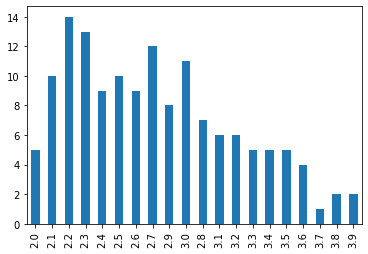

In [9]:
cats_df['Bwt'].value_counts(sort=False).plot.bar()

<AxesSubplot:ylabel='Frequency'>

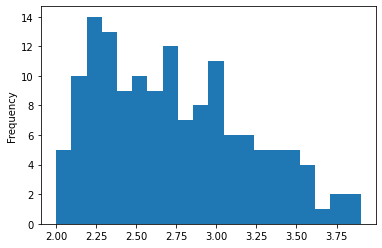

In [10]:
cats_df['Bwt'].plot.hist(bins=20)

In [11]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data_df = pd.DataFrame(data)
data_df

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [12]:
ss.shapiro(data_df['before']), ss.shapiro(data_df['after'])

(ShapiroResult(statistic=0.9644594192504883, pvalue=0.8352694511413574),
 ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687))

In [13]:
ss.ttest_1samp(cats_df['Bwt'], popmean=mu)

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

In [14]:
ss.ttest_rel(data_df['before'], data_df['after'], alternative='two-sided')

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

In [15]:
female = cats_df.loc[cats_df['Sex'] == 'F', 'Bwt']
male = cats_df.loc[cats_df['Sex'] == 'M', 'Bwt']

In [16]:
ss.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [17]:
ss.ttest_ind(female, male, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [18]:
iris_df = pd.read_csv('data/iris.csv')
iris_df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
target_list = iris_df['target'].unique()
setosa = iris_df.loc[iris_df['target'] == 'Iris-setosa', 'sepal width']
versicolor = iris_df.loc[iris_df['target'] == 'Iris-versicolor', 'sepal width']
virginica = iris_df.loc[iris_df['target'] == 'Iris-virginica', 'sepal width']

c:\Users\admin\anaconda3\lib\site-packages\seaborn\relational.py:608: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = ax.scatter(scout_x, scout_y, **kws)


<AxesSubplot:xlabel='target', ylabel='sepal width'>

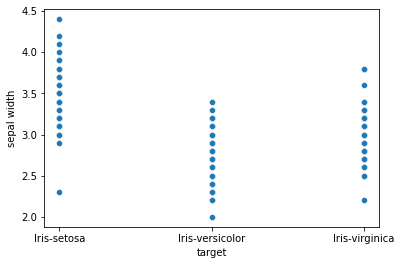

In [20]:
sns.scatterplot(data=iris_df, x='target', y='sepal width')

In [21]:
ss.shapiro(setosa)
ss.shapiro(versicolor)
ss.shapiro(virginica)

ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)

In [22]:
ss.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [23]:
ss.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

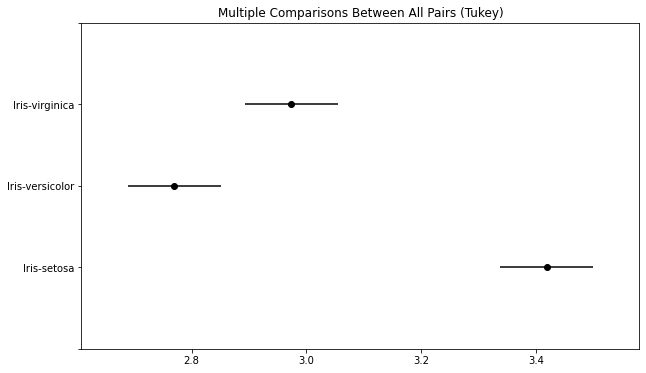

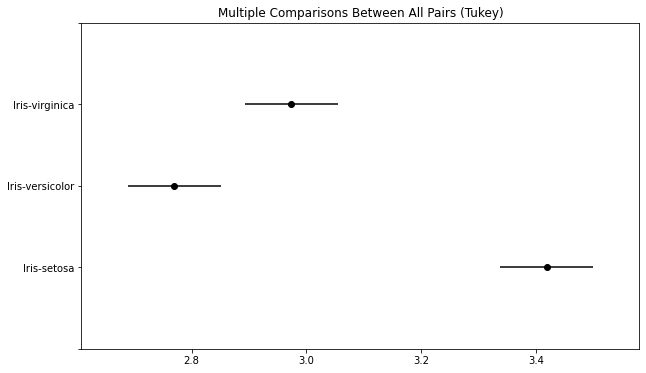

In [24]:
mc = smsm.MultiComparison(data=iris_df['sepal width'], groups=iris_df['target'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
tukeyhsd.plot_simultaneous()


In [25]:
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [26]:
ss.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [27]:
pg.welch_anova(data=iris_df, dv='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


In [28]:
mt_df = pd.read_csv('data/mtcars.csv')
mt_df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [29]:
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = smfa.ols(formula, mt_df).fit()
aov_table = anova_lm(model, typ=2)
aov_table.round(3)


,sum_sq,df,F,PR(>F)
C(cyl),456.401,2.0,24.819,0.000
C(am),36.767,1.0,3.999,0.056
C(cyl):C(am),25.437,2.0,1.383,0.269
Residual,239.059,26.0,NaN,NaN


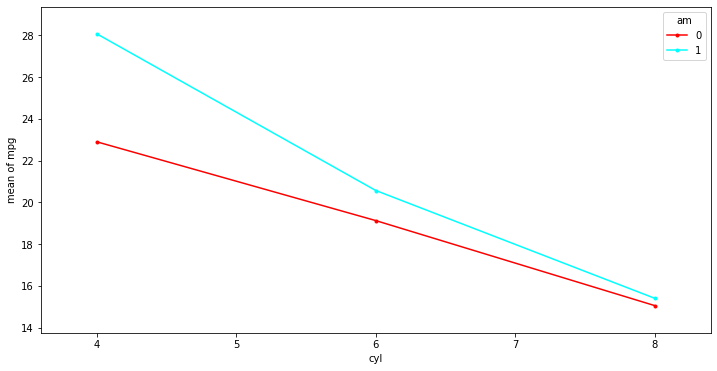

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig = interaction_plot(mt_df['cyl'], mt_df['am'], mt_df['mpg'], ax=ax)

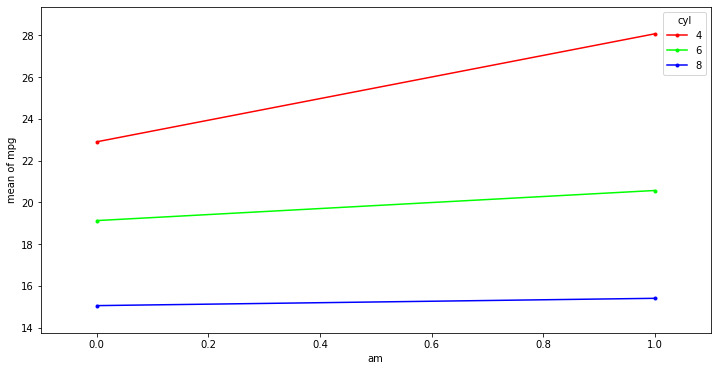

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig = interaction_plot(mt_df['am'], mt_df['cyl'], mt_df['mpg'], ax=ax)

In [32]:
tit_df = pd.read_csv('data/titanic.csv')
tit_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg


In [33]:
sex_rate = tit_df['sex'].value_counts(normalize=True).reindex(['male', 'female'])
obs = tit_df[tit_df['survived'] == 1]['sex'].value_counts().reindex(['male', 'female'])
sex_rate * obs.sum()

male      221.474747
female    120.525253
Name: sex, dtype: float64

In [34]:
ss.chisquare(f_obs=obs, f_exp=sex_rate * obs.sum())

Power_divergenceResult(statistic=162.08166685161612, pvalue=3.970516389658729e-37)

In [35]:
chi2, p, ddof, expected = ss.chi2_contingency(pd.crosstab(tit_df['class'], tit_df['survived']))
chi2, p, ddof, expected

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [36]:
pd.crosstab(tit_df['class'], tit_df['survived']).values

array([[ 80, 136],
       [ 97,  87],
       [372, 119]], dtype=int64)

In [37]:
house_df = pd.read_csv('data/kc_house_data.csv')
house_df[['price', 'sqft_living']].corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [38]:
formula = 'price ~ sqft_living'
model = smfa.ols(formula, data=house_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:50:30   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
y_pred = model.predict(house_df['sqft_living'])

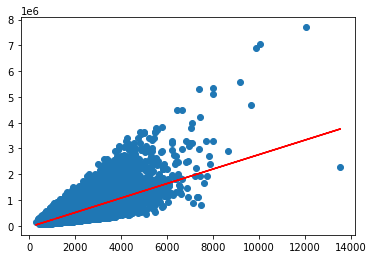

In [40]:
plt.scatter(house_df['sqft_living'], house_df['price'])
plt.plot(house_df['sqft_living'], y_pred, c='red')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

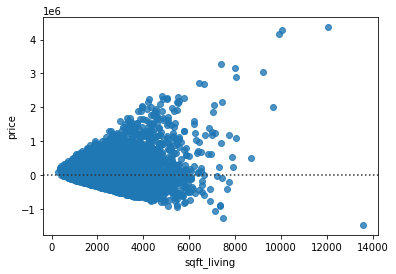

In [41]:
sns.residplot(x='sqft_living', y='price', data=house_df)

In [42]:
car_df = pd.read_csv('data/Cars93.csv')
car_df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,7,187,115,72,38,34.0,-2147483648,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,5,180,103,67,35,31.5,14,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26.0,15,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14,2985,non-USA,Volvo 240


In [43]:
car_df.columns = car_df.columns.str.replace('.', '')
car_df.columns

C:\Users\admin\AppData\Local\Temp\ipykernel_19288\3640513363.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_df.columns = car_df.columns.str.replace('.', '')


Index(['Manufacturer', 'Model', 'Type', 'MinPrice', 'Price', 'MaxPrice',
       'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Revpermile', 'Mantransavail',
       'Fueltankcapacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turncircle', 'Rearseatroom', 'Luggageroom', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [44]:
model = smfa.ols('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=car_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           4.88e-14
Time:                        18:50:30   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
car_df[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [46]:
y, X = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=car_df, return_type='dataframe')

In [47]:
vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [48]:
us_df = pd.read_csv('data/USArrests.csv')
us_df = us_df.rename({'Unnamed: 0':'State'}, axis=1)
us_df

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


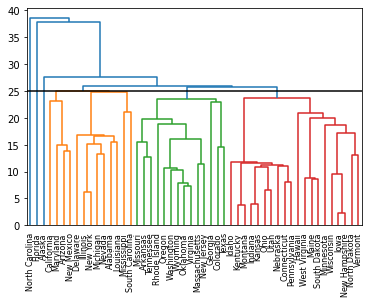

In [49]:
single = sch.linkage(us_df.iloc[:, 1:], metric='euclidean', method='single')
sch.dendrogram(single, labels=us_df['State'].tolist(), color_threshold=25, show_leaf_counts=True)
plt.axhline(y=25, color='black')
plt.show()

In [50]:
single.shape, len(us_df['State'].tolist())

((49, 4), 50)

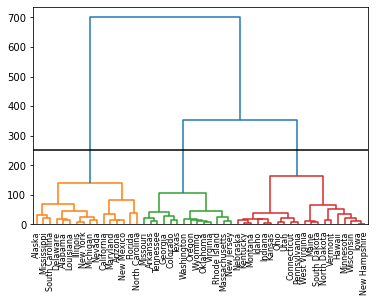

In [51]:
ward = sch.linkage(us_df.iloc[:, 1:], metric='euclidean', method='ward')
sch.dendrogram(ward, labels=us_df['State'].tolist(), color_threshold=250, show_leaf_counts=True)
plt.axhline(y=250, color='black')
plt.show()

In [52]:
assignments = sch.fcluster(ward, 250, criterion='distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [53]:
us_df['cluster'] = assignments

In [54]:
us_df.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [55]:
X = iris_df.drop('target', axis=1)
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
def elbow(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=0).fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1, 11), sse, marker='o')

c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


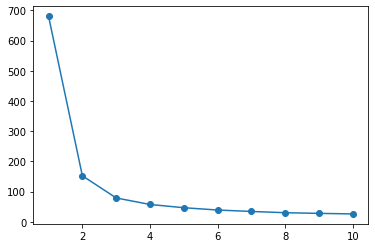

In [57]:
elbow(X)

In [58]:
km = KMeans(n_clusters=3, random_state=0).fit(X)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [59]:
X_add_label = X.assign(labels=km.labels_)
X_add_label


,sepal length,sepal width,petal length,petal width,labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


c:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


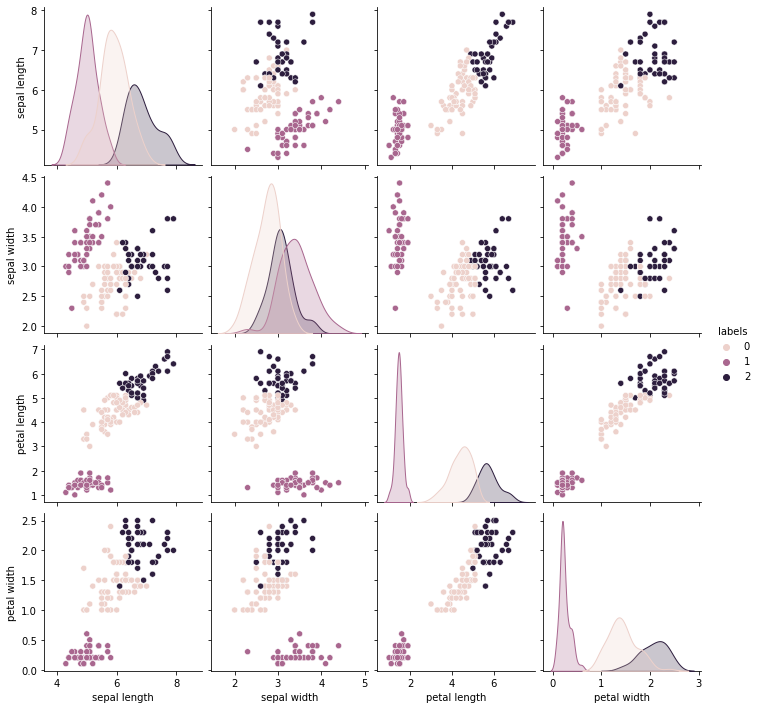

In [60]:
sns.pairplot(data=X_add_label, hue='labels')

In [101]:
pipe = make_pipeline(StandardScaler(), GaussianMixture(n_components=3)).fit(X)
pipe.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [62]:
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data, columns=['product'])
test_df.head()

,product
0,a
1,a
2,b
3,b
4,a


In [63]:
test_df['product'] = test_df['product'].replace({'a':1, 'b':0})
test_df

,product
0,1
1,1
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [64]:
runstest_1samp(test_df['product'], cutoff=0.5, correction=True)

(-1.1144881152070183, 0.26506984027306035)

In [65]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

In [66]:
te = TransactionEncoder()
te_data = te.fit_transform(dataset)

In [67]:
trans_df = pd.DataFrame(te_data, columns=te.columns_)

In [68]:
item_sets = apriori(trans_df, min_support=0.3, use_colnames=True)
item_sets['length'] = item_sets['itemsets'].apply(lambda x: len(x))
item_sets

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Beer, Apple)",2
5,0.375,"(Beer, Milk)",2
6,0.500,"(Beer, Rice)",2


In [69]:
gro_df = pd.read_csv('data/groceries.csv')
gro_df

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [70]:
file = open('data/groceries.csv', mode='r', encoding='utf-8')
gro_df = pd.DataFrame(file.read().splitlines(), columns=['food'])
gro_df
file.close()

In [71]:
gro_df['food'] = gro_df['food'].str.replace('"', '')
gro_df

,food
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [72]:
df_split_ary = gro_df['food'].str.split(',', expand=True).values

In [73]:
groceries = []
for i in range(len(df_split_ary)):
    temp = list(filter(None, df_split_ary[i]))
    groceries.append(temp)

groceries

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [74]:
te = TransactionEncoder()
groceries_tr = te.fit_transform(groceries)
gro_tr_df = pd.DataFrame(groceries_tr, columns=te.columns_)
gro_tr_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
gro_ap = apriori(gro_tr_df, min_support=0.01, use_colnames=True)

In [76]:
association_rules(gro_ap, metric='lift', min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
1,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
...,...,...,...,...,...,...,...,...,...
593,"(whipped/sour cream, whole milk)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943
594,"(yogurt, whole milk)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033
595,(whipped/sour cream),"(yogurt, whole milk)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881
596,(yogurt),"(whipped/sour cream, whole milk)",0.139502,0.032232,0.010880,0.077988,2.419607,0.006383,1.049627


In [77]:
data_df = pd.read_csv('data/arima_data.csv', names=['day', 'price'])
data_df['day'] = pd.to_datetime(data_df['day'])
data_df = data_df.set_index('day')
data_df.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


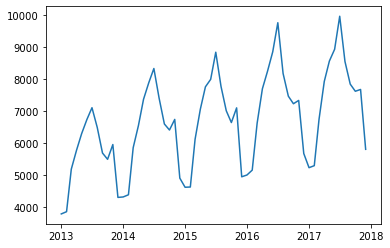

In [78]:
plt.plot(data_df.index, data_df['price'])

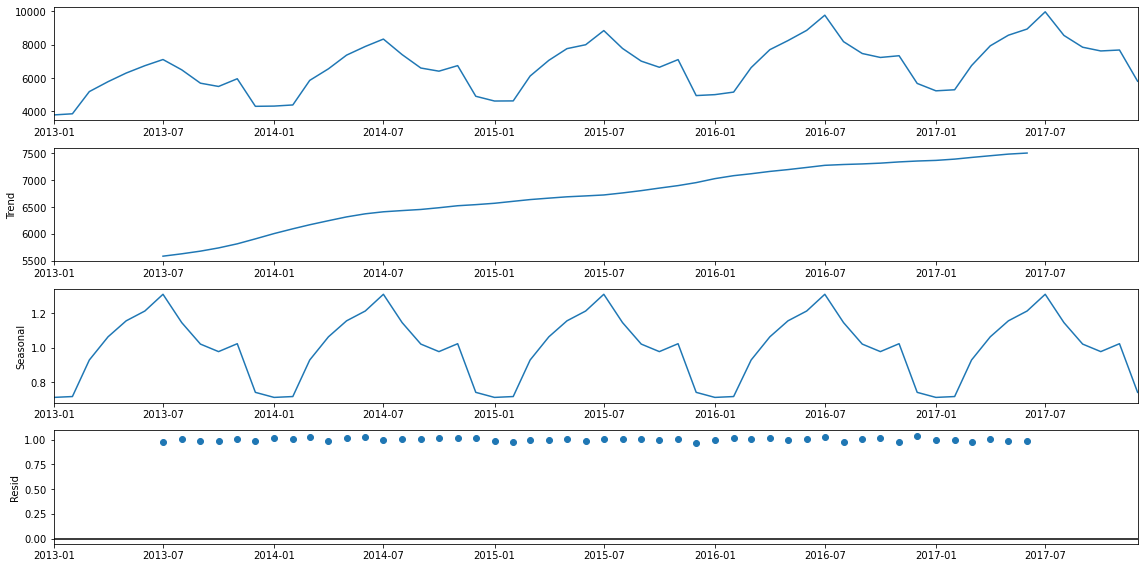

In [79]:
result = smts.seasonal_decompose(data_df, model='multiplicative')
plt.rcParams['figure.figsize'] = [16, 8]
result.plot()
plt.show()

In [80]:
X_train = data_df.loc[:'2016-12-01', :]
X_test = data_df.loc['2017-01-01':, :]

In [81]:
adf = adfuller(X_train, regression='c')
adf

(-0.7593260321092967,
 0.8307788372815357,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 574.3596114052543)

<AxesSubplot:xlabel='day'>

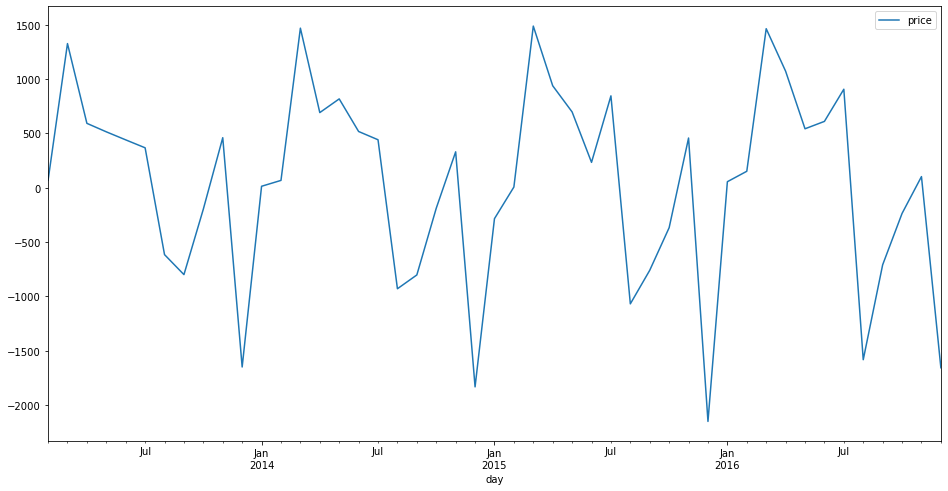

In [82]:
diff_data = X_train.diff(1).dropna()
diff_data.plot()

In [83]:
adfuller(diff_data, regression='c')

(-12.094547576926429,
 2.085160639961008e-22,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 522.2910197373668)

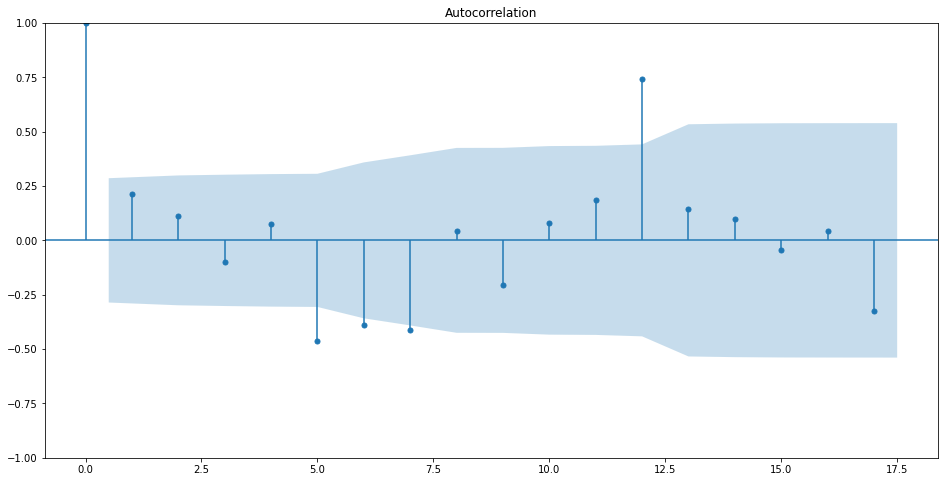

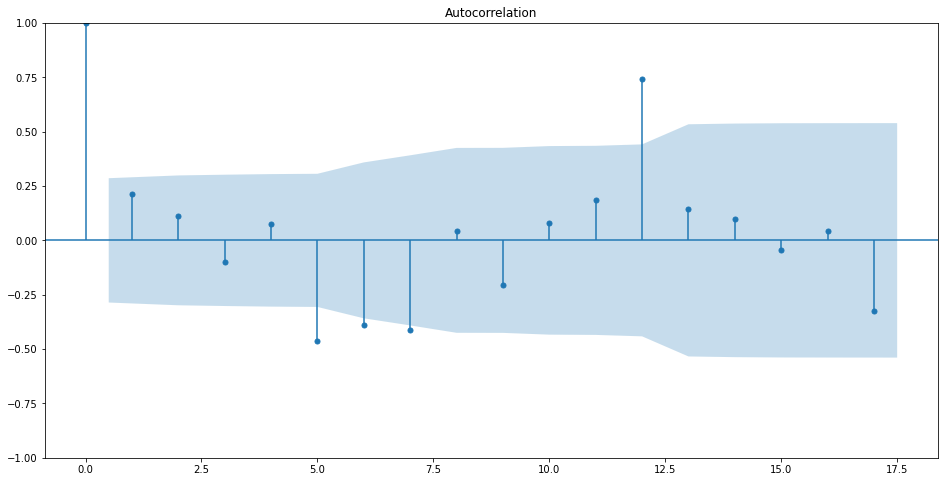

In [84]:
plot_acf(diff_data)

c:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


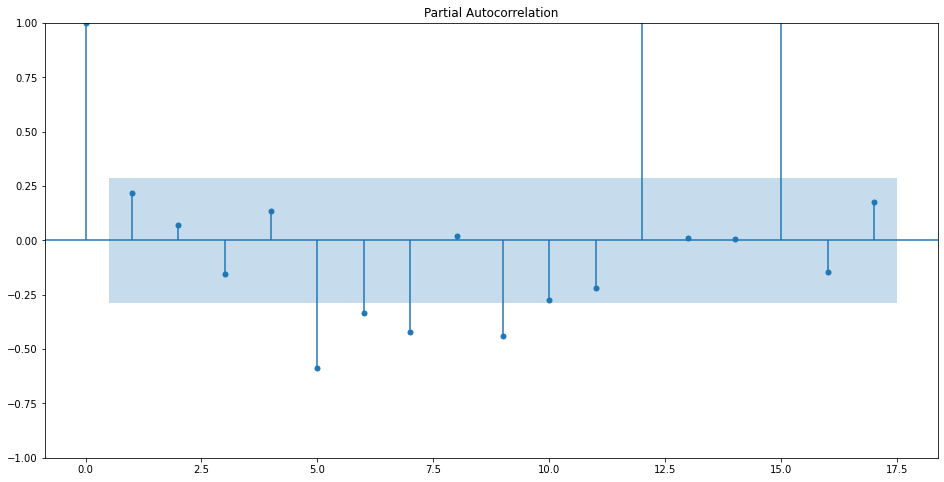

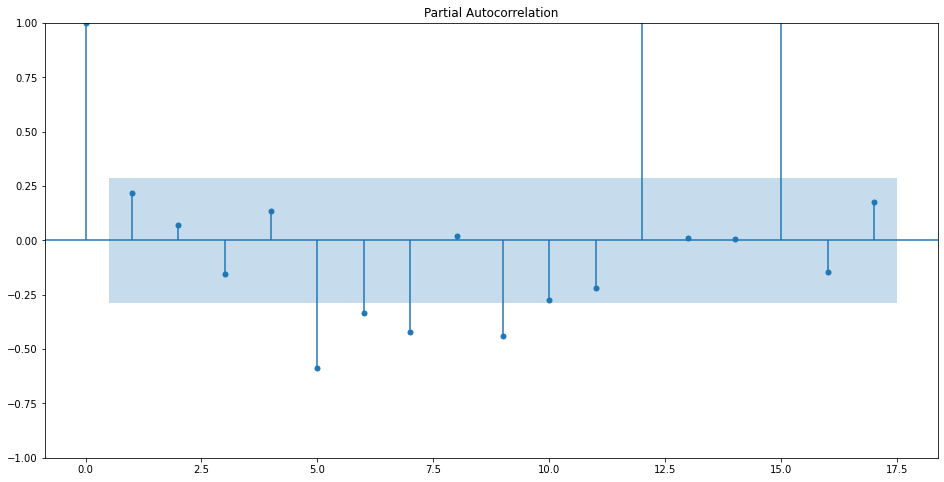

In [85]:
plot_pacf(diff_data)

In [86]:
model = ARIMA(X_train, order=[2, 0, 2], trend='ct').fit()
model.summary()

c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -380.820
Date:                Sun, 06 Nov 2022   AIC                            775.641
Time:                        18:50:38   BIC                            788.739
Sample:                    01-01-2013   HQIC                           780.591
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5282.7120    704.253      7.501      0.000    3902.401    6663.023
x1            45.1229     23.326      1.934      0.053      -0.596      90.842
ar.L1         -0.4787      0.167     -2.859      0.004      -0.807      -0.150
ar.L2          0.5170      0.170      3.041      0.002       0.184       0.850
ma.L1          1.9561      0.212      9.244      0.000       1.541       2.371
ma.L2          0.9851      0.214      4.607      0.000       0.566       1.404
sigma2       3.85e+05      0.132   2.91e+06      0.000    3.85e+05    3.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.75   Prob(JB):                         0.48
Heteroskedasticity (H):               1.37   Skew:                            -0.43
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.01e+23. Standard errors may be unstable.
"""

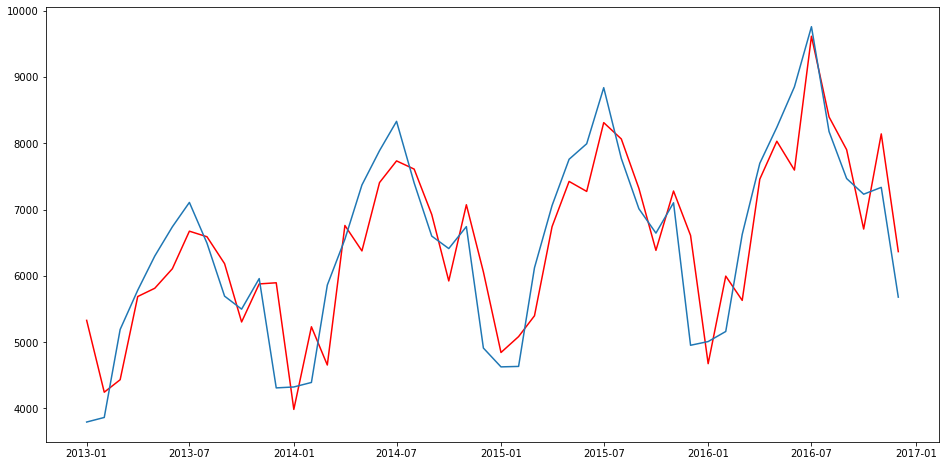

In [87]:
plt.plot(model.predict(), color='red')
plt.plot(X_train)

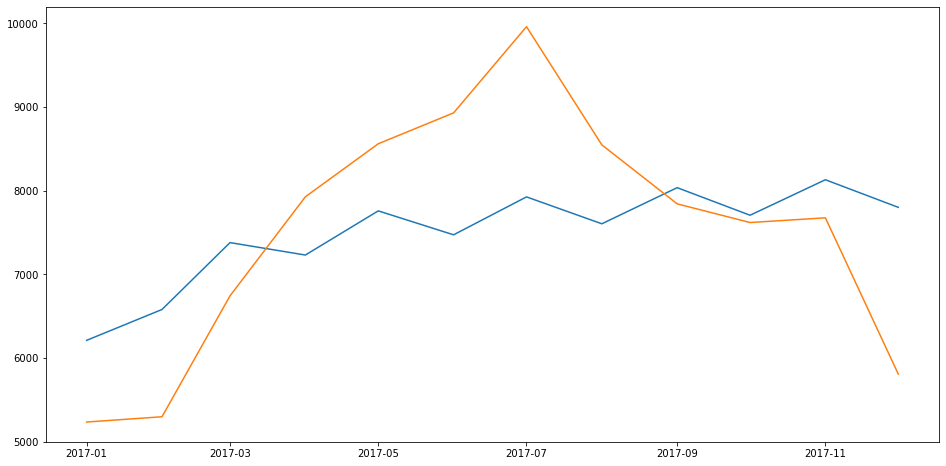

In [88]:
test_pred = model.forecast(steps=len(X_test), alpha=0.05)
plt.plot(test_pred)
plt.plot(X_test)


In [89]:
r2_score(X_test, test_pred)

0.356039548347706

In [90]:
len(X_train)

48

In [91]:
X_month = np.hstack([data_df.index.month.values.reshape(-1, 1), data_df.index.values.astype('int').reshape(-1, 1)])
y = data_df.values
X_train = X_month[:48]
X_test = X_month[48:]
y_train = y[:48]
y_test = y[48:]

In [92]:
forest = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
r2_score(y_test, forest.predict(X_test))

C:\Users\admin\AppData\Local\Temp\ipykernel_19288\3411111951.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)


0.5569356638507459

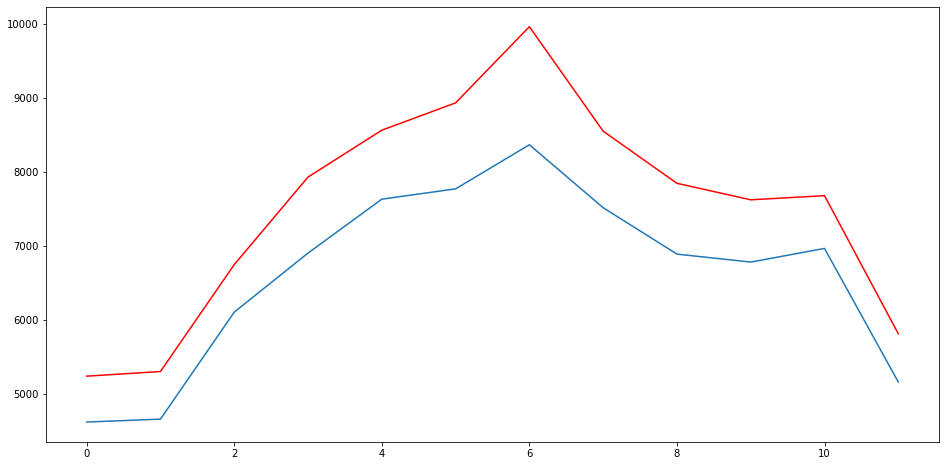

In [93]:
plt.plot(y_test, color='red')
plt.plot(forest.predict(X_test))

In [94]:
X_train = data_df.loc[:'2016-12-01', :]
X_test = data_df.loc['2017-01-01':, :]

In [95]:
auto_model = auto_arima(X_train, start_p=0, d=1, start_q=0, max_p=3, max_q=3, 
start_P=0, start_Q=0, max_P=3, max_Q=3, m=12, seasonal=True, information_criterion= 'aic')

In [96]:
auto_model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [97]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sun, 06 Nov 2022   AIC                            480.687
Time:                                     18:50:40   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

0.9305467063577881

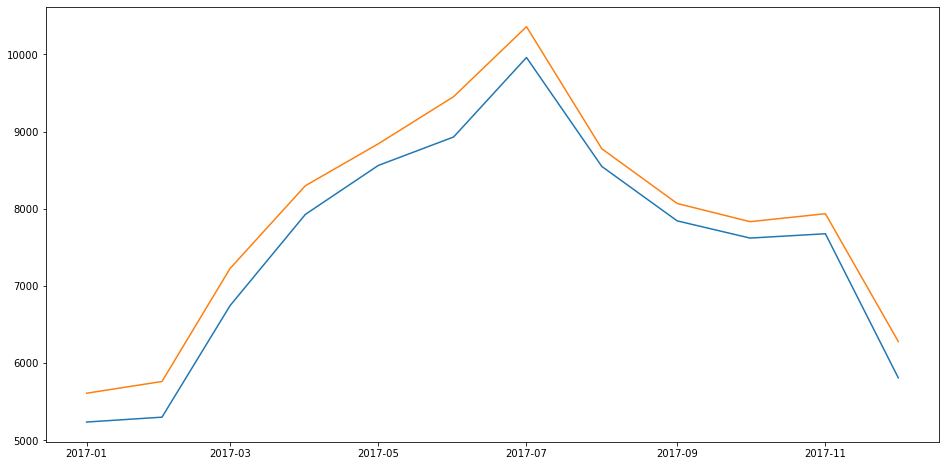

In [98]:
plt.plot(X_test)
plt.plot(auto_model.predict(n_periods=len(X_test)))
r2_score(X_test, auto_model.predict(n_periods=len(X_test)))